<a href="https://colab.research.google.com/github/shubham6760/news-topic-modeling-using-lda/blob/main/news_topic_modeling_using_lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split

# Iteratively read files
import glob
import os

%matplotlib inline

In [ ]:
print(f"Current working directory is: {os.getcwd()}")
dir = os.chdir("/kaggle")
print(f'Changing directory to {os.getcwd()}')

Current working directory is: /kaggle/working
Changing directory to /kaggle


In [ ]:
#User defined function to read and store bbc Data from multiple folders
def load_data(folder_names, root_path):
    fileNames = [path + "/input/bbc-news-summary/BBC News Summary/News Articles/" + folder + '/' + "*.txt"
        for path,folder in zip([root_path]*len(folder_names), folder_names)]
    #print(fileNames)
    #print("\n")
    doc_list = []
    tags = folder_names
    for docs in fileNames:
        #print(docs)
        doc = glob.glob(docs)#glob method iterates through all files and reads the text in documents in the folders
        for text in doc:
            with open(text, encoding="latin-1") as f:
                topic = docs.split('/')[len(docs.split('/'))-2]
                lines = f.readlines()
                heading = lines[0].strip()#stripping the text by spaces and using first element into heading
                body = ' '.join([l.strip() for l in lines[1:]])
                doc_list.append([topic,heading,body])
        print(f"Loading data from \033[1m{topic}\033[0m directory")
    print("\nEntire Data is loaded successfully")
    
    return doc_list

In [ ]:
#Loading dataset
folder_names = ['business','entertainment','politics','sport','tech']
docs = load_data(folder_names = folder_names, root_path = os.getcwd())

Loading data from business directory
Loading data from entertainment directory
Loading data from politics directory
Loading data from sport directory
Loading data from tech directory

Entire Data is loaded successfully


In [ ]:
docs = pd.DataFrame(docs, columns=['Category', 'Heading', 'Article'])
docs.head()

,Category,Heading,Article
0,business,US consumer confidence up,Consumers' confidence in the state of the US ...
1,business,The 'ticking budget' facing the US,The budget proposals laid out by the administ...
2,business,Mitsubishi in Peugeot link talks,Trouble-hit Mitsubishi Motors is in talks wit...
3,business,BMW reveals new models pipeline,BMW is preparing to enter the market for car-...
4,business,World leaders gather to face uncertainty,"More than 2,000 business and political leader..."


In [ ]:
#splitting data into train and test sets
train_docs, test_docs = train_test_split(docs,stratify=docs.Category, test_size=50,random_state=42)

In [ ]:
train_docs.shape, test_docs.shape

((2175, 3), (50, 3))

In [ ]:
vectorizer = TfidfVectorizer(max_df=.2, 
                             min_df=.01, 
                             stop_words='english')

train_dtm = vectorizer.fit_transform(train_docs["Article"])
words = vectorizer.get_feature_names()
train_dtm

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<2175x2908 sparse matrix of type '<class 'numpy.float64'>'
	with 205635 stored elements in Compressed Sparse Row format>

In [ ]:
len(words)

2908

In [ ]:
#assigning number of topics
n_components = 5
topic_labels = ['Topic {}'.format(i) for i in range(1, n_components+1)]

In [ ]:
topic_labels

['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5']

In [ ]:
lda_base = LatentDirichletAllocation(n_components=n_components,
                                     n_jobs=-1,
                                     learning_method='batch',
                                     max_iter=10)
lda_base.fit(train_dtm)

LatentDirichletAllocation(n_components=5, n_jobs=-1)

In [ ]:
# pseudo counts
topics_count = lda_base.components_
print(topics_count.shape)
topics_count[:5]

(5, 2908)


array([[ 0.20000688, 12.37531848,  6.31238104, ...,  1.3572584 ,
         0.20981272,  0.20084896],
       [ 0.20003303,  0.5453197 ,  0.21517794, ...,  0.20802951,
         0.20005332,  0.20237845],
       [ 4.06021183,  9.7315913 ,  4.50965084, ...,  2.2995493 ,
        11.60214534,  5.32828875],
       [ 0.23086997,  0.20023379,  0.20012519, ...,  0.20021216,
         0.20013103,  0.20006703],
       [ 0.20007697,  0.20012637,  0.2001289 , ...,  0.20012964,
         0.20013498,  0.20006903]])

In [ ]:
topics_prob = topics_count / topics_count.sum(axis=1).reshape(-1, 1)
topics = pd.DataFrame(topics_prob.T,
                      index=words,
                      columns=topic_labels)
topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
000m,0.000027,0.000133,0.000411,0.000387,0.000344
10,0.001674,0.000362,0.000985,0.000336,0.000344
100,0.000854,0.000143,0.000456,0.000336,0.000344
100m,0.000170,0.000414,0.000296,0.000346,0.000344
11,0.000759,0.001222,0.000508,0.000336,0.000344


In [ ]:
topics.shape

(2908, 5)

In [ ]:
#setting display options
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14.0, 8.7)
pd.options.display.float_format = '{:,.2f}'.format

<AxesSubplot:>

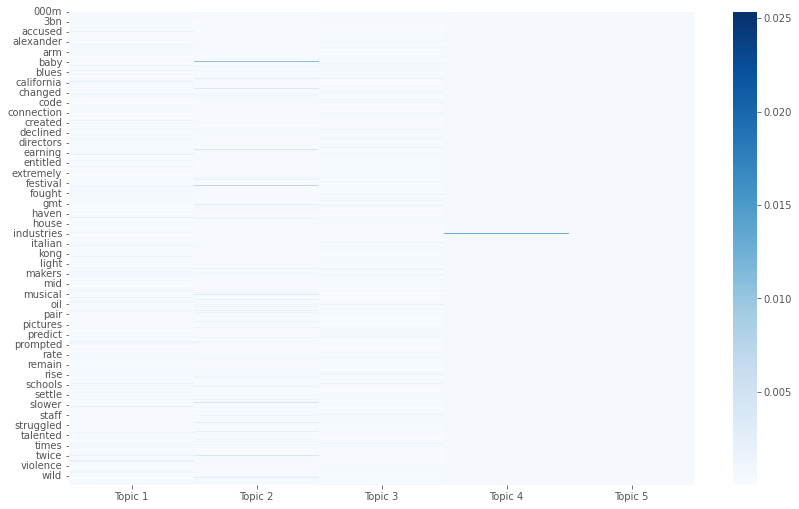

In [ ]:
sns.heatmap(topics, cmap='Blues')

In [ ]:
#top words in each topic
top_words = {}
for topic, words_ in topics.items():
    top_words[topic] = words_.nlargest(20).index.tolist()
pd.DataFrame(top_words)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,music,film,labour,indoor,finances
1,market,best,game,60m,formal
2,sales,awards,election,jump,audio
3,company,award,party,fastest,shops
4,mobile,actor,blair,medal,introduction
5,growth,festival,england,silver,investor
6,2004,films,win,birmingham,popularity
7,firm,star,brown,000m,motorcycle
8,technology,actress,club,olympic,falls
9,million,oscar,minister,championships,chicago


In [ ]:
train_preds = lda_base.transform(train_dtm)
train_preds.shape

(2175, 5)

In [ ]:
t = train_preds[0:5]
print(t)
np.argmax(t,axis =1)

[[0.29276688 0.26561283 0.39384379 0.02388798 0.02388852]
 [0.89354023 0.02650461 0.02731994 0.02631721 0.02631801]
 [0.43499228 0.48750027 0.02718823 0.02515928 0.02515994]
 [0.90948909 0.02247398 0.02335754 0.02233946 0.02233993]
 [0.02415362 0.02407874 0.90440689 0.02368019 0.02368056]]


array([2, 0, 1, 0, 2])

In [ ]:
train_eval = pd.DataFrame(train_preds, columns=topic_labels, index=train_docs.Category)
train_eval.head(n=10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
Category,,,,,
entertainment,0.29,0.27,0.39,0.02,0.02
tech,0.89,0.03,0.03,0.03,0.03
entertainment,0.43,0.49,0.03,0.03,0.03
business,0.91,0.02,0.02,0.02,0.02
sport,0.02,0.02,0.90,0.02,0.02
business,0.90,0.02,0.02,0.02,0.02
politics,0.02,0.02,0.93,0.02,0.02
politics,0.02,0.02,0.91,0.02,0.02
business,0.92,0.02,0.02,0.02,0.02


In [ ]:
train_docs.loc[1,:]

Category                                             business
Heading                    The 'ticking budget' facing the US
Article      The budget proposals laid out by the administ...
Name: 1, dtype: object

<AxesSubplot:title={'center':'Avg. Topic Probabilities'}, xlabel='Category'>

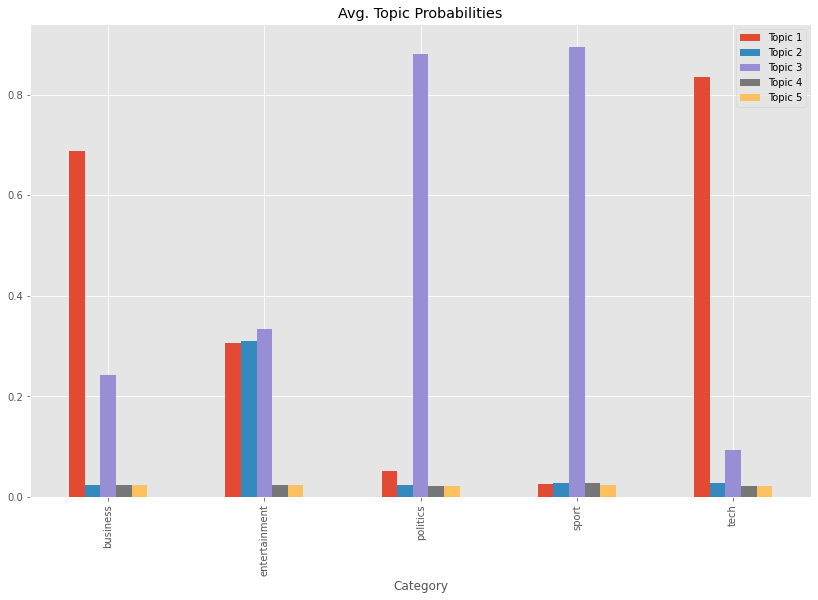

In [ ]:
train_eval.groupby(level='Category').mean().plot.bar(title='Avg. Topic Probabilities')

Text(0.5, 1.0, 'Train Data: Topic Assignments')

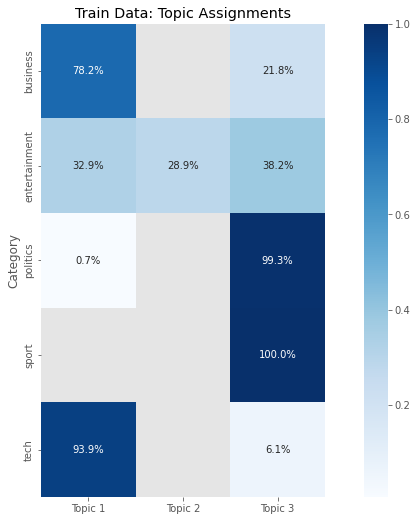

In [ ]:
df = train_eval.groupby(level='Category').idxmax(
    axis=1).reset_index(-1, drop=True)
sns.heatmap(df.groupby(level='Category').value_counts(normalize=True)
            .unstack(-1), annot=True, fmt='.1%', cmap='Blues', square=True)
plt.title('Train Data: Topic Assignments')

In [ ]:
df.groupby(level='Category').value_counts(normalize=True).unstack(-1)

,Topic 1,Topic 2,Topic 3
Category,,,
business,0.78,NaN,0.22
entertainment,0.33,0.29,0.38
politics,0.01,NaN,0.99
sport,NaN,NaN,1.00
tech,0.94,NaN,0.06


In [ ]:
test_dtm = vectorizer.transform(test_docs.Article)
test_dtm

<50x2908 sparse matrix of type '<class 'numpy.float64'>'
	with 4689 stored elements in Compressed Sparse Row format>

In [ ]:
test_preds = lda_base.transform(test_dtm)
test_eval = pd.DataFrame(test_preds, columns=topic_labels, index=test_docs.Category)
test_eval.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
Category,,,,,
entertainment,0.15,0.57,0.21,0.03,0.03
tech,0.93,0.02,0.02,0.02,0.02
tech,0.71,0.02,0.22,0.02,0.02
business,0.70,0.02,0.24,0.02,0.02
sport,0.03,0.03,0.88,0.03,0.03


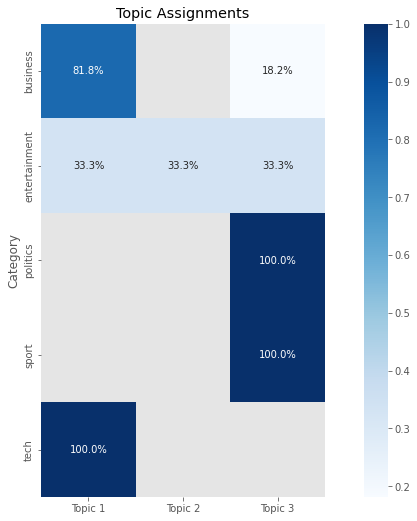

In [ ]:
df = test_eval.groupby(level='Category').idxmax(
    axis=1).reset_index(-1, drop=True)
sns.heatmap(df.groupby(level='Category').value_counts(normalize=True)
            .unstack(-1), annot=True, fmt='.1%', cmap='Blues', square=True)
plt.title('Topic Assignments');

In [ ]:
# Create Training Dataframe for Comparing Misclassified documents
train_opt_eval = pd.DataFrame(data=lda_base.transform(train_dtm),
                              columns=topic_labels,
                              index=train_docs.Category)

In [ ]:
train_opt_eval.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
Category,,,,,
entertainment,0.29,0.27,0.39,0.02,0.02
tech,0.89,0.03,0.03,0.03,0.03
entertainment,0.43,0.49,0.03,0.03,0.03
business,0.91,0.02,0.02,0.02,0.02
sport,0.02,0.02,0.90,0.02,0.02


In [ ]:
test_opt_eval = pd.DataFrame(data=lda_base.transform(test_dtm),
                              columns=topic_labels,
                              index=test_docs.Category)

In [ ]:
test_opt_eval.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
Category,,,,,
entertainment,0.15,0.57,0.21,0.03,0.03
tech,0.93,0.02,0.02,0.02,0.02
tech,0.71,0.02,0.22,0.02,0.02
business,0.70,0.02,0.24,0.02,0.02
sport,0.03,0.03,0.88,0.03,0.03


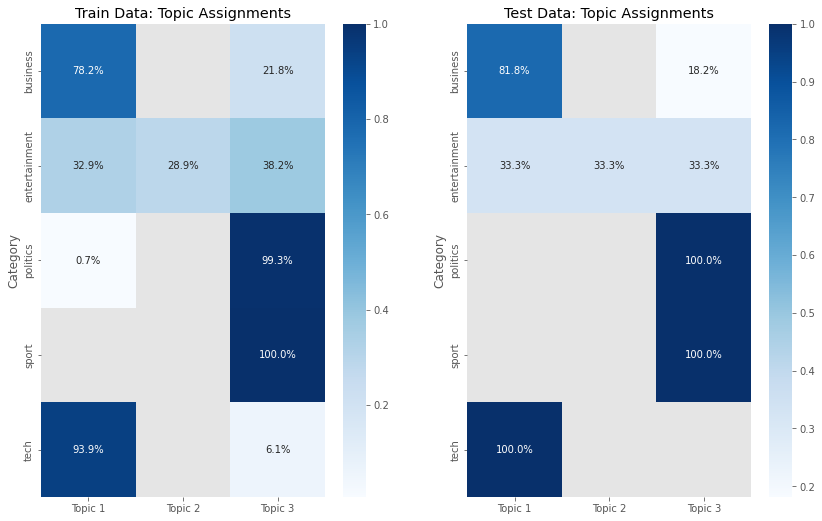

In [ ]:
## Comparing Side by Side
fig, axes = plt.subplots(ncols=2)
source = ['Train', 'Test']
for i, df in enumerate([train_opt_eval, test_opt_eval]):
    df = df.groupby(level='Category').idxmax(
    axis=1).reset_index(-1, drop=True)
    sns.heatmap(df.groupby(level='Category').value_counts(normalize=True)
            .unstack(-1), annot=True, fmt='.1%', cmap='Blues', square=True, ax=axes[i])
    axes[i].set_title('{} Data: Topic Assignments'.format(source[i]));